# Clase 1. Introducción a conceptos y la idea intuitiva

## Primera parte: Acercamiento a la idea intuitiva usando la media


En esta primera parte vamos a acercanos a la idea intuitiva de lo que buscamos lograr con el modelo de regresión, por qué lo calculamos como lo calculamos, por qué sus supuestos son los que son.

**Pregunta**: ¿por qué usamos la media para representar a un conjunto de datos?

**Objetivo fundamental**: ver la media como una especie de pronostico e introducir
algo del lenguaje usado en los análisis de regresión.


### Generar datos ficticios para un ejercicio usando como escenario goles de un partido de futbol

In [1]:
#!pip install numpy pandas matplotlib

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [3]:
# Importar bibliotecas necesarias
import numpy as np
import pandas as pd

# Establecer semilla para reproducibilidad: asegura que los datos generados sean los mismos en cada ejecución
np.random.seed(123)

# Generar datos ficticios de goles usando una distribución normal:
# loc=4 establece el promedio en 4 goles por partido, y scale=1.5 establece la desviación estándar en 1.5.
# Esto crea 300 valores simulando los goles de 300 partidos.
goles = np.random.normal(loc=4, scale=1.5, size=300)

# Redondear los valores de goles al número entero más cercano, ya que los goles solo pueden ser valores enteros
goles = np.round(goles)

# Reemplazar valores negativos por 0 para mantener solo valores no negativos (no existen goles negativos en la realidad)
goles[goles < 0] = 0

# Crear un DataFrame para organizar y visualizar los datos:
# La columna 'Partido' contiene el número de cada partido (del 1 al 300) y la columna 'Goles' el total de goles anotados.
df_goles = pd.DataFrame({'Partido': range(1, 301), 'Goles': goles})

# Mostrar las primeras 10 filas del DataFrame para verificar los datos
df_goles.head(10)


,Partido,Goles
0,1,2.0
1,2,5.0
2,3,4.0
3,4,2.0
4,5,3.0
5,6,6.0
6,7,0.0
7,8,3.0
8,9,6.0
9,10,3.0


### La media como reductor de los residuos
Vamos a hacer el análisis sencillo. Veamos la media. 

In [4]:

# Calcular la media de los goles
media = df_goles['Goles'].mean()
print("Media:", media)

# Calcular la desviación estándar de los goles
sd = df_goles['Goles'].std()
print("Desviación estándar:", sd)


Media: 3.9366666666666665
Desviación estándar: 1.540747187310833


Restar la media a cada elemento de la columna Goles

In [5]:

# Restar la media a cada elemento y añadir la columna 'Diferencia' en el DataFrame
df_goles['Diferencia'] = df_goles['Goles'] - media
df_goles.head(10)


,Partido,Goles,Diferencia
0,1,2.0,-1.936667
1,2,5.0,1.063333
2,3,4.0,0.063333
3,4,2.0,-1.936667
4,5,3.0,-0.936667
5,6,6.0,2.063333
6,7,0.0,-3.936667
7,8,3.0,-0.936667
8,9,6.0,2.063333
9,10,3.0,-0.936667


Ahora elevamos ese valor al cuadrado y lo sumamos (Pregunta: qué calculamos aquí? V)

In [6]:

# Calcular la suma de las diferencias al cuadrado
sumatoria = np.sum(df_goles['Diferencia'] ** 2)
print("Sumatoria de diferencias al cuadrado:", sumatoria)


Sumatoria de diferencias al cuadrado: 709.7966666666666


Probemos qué ocurriría si el valor de la media fuera 1, 2, 3, 4,5, 6 o 7


In [7]:
# Función para calcular suma de diferencias al cuadrado con un valor dado
def funcion_suma(valor):
    return np.sum((df_goles['Goles'] - valor) ** 2)

# Crear un vector con los valores a comparar
valcomp = [media, 1, 2, 3, 4, 5, 6, 7]

# Calcular y almacenar resultados en un DataFrame
resultados = [funcion_suma(valor) for valor in valcomp]
df_compEsp = pd.DataFrame({'Media': valcomp, 'Suma de diferencias': resultados})
df_compEsp


,Media,Suma de diferencias
0,3.936667,709.796667
1,1.000000,3297.000000
2,2.000000,1835.000000
3,3.000000,973.000000
4,4.000000,711.000000
5,5.000000,1049.000000
6,6.000000,1987.000000
7,7.000000,3525.000000


Volvemos a ver el df original y analicemos. 
Tenemos. 
1) Los datos Xi 
2) Los valores especificos de los goles en el partido i
3) Diferencia entre el valor esperado (3.93) y el valor que tomó el evento i. **Esa diferencia se conoce como residuo o error**

### CONCLUSIONES
1. El valor cuyo pronostico es el que, en sumatoria, nos aleja menos del valor real
es el valor de la media. Y cada valor real, se aleja en promedio, 1.54 en cada ejecución
ya sea hacia abajo o por encima de la media. 
2. Es por eso que, el mejor valor que podemos ESPERAR es la media.

In [8]:
df_goles

,Partido,Goles,Diferencia
0,1,2.0,-1.936667
1,2,5.0,1.063333
2,3,4.0,0.063333
3,4,2.0,-1.936667
4,5,3.0,-0.936667
...,...,...,...
295,296,5.0,1.063333
296,297,7.0,3.063333
297,298,5.0,1.063333
298,299,4.0,0.063333


Veamos ahora qué pasa con los errores en el agregado. 

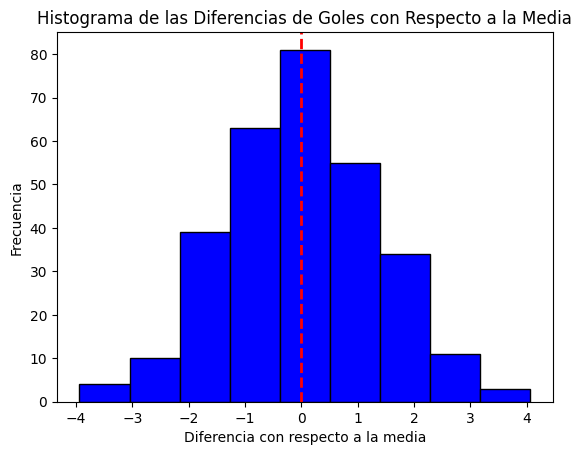

In [9]:

# Visualización del histograma de diferencias
plt.hist(df_goles['Diferencia'], bins=9, color='blue', edgecolor='black')
plt.axvline(0, color='red', linewidth=2, linestyle='--')
plt.title("Histograma de las Diferencias de Goles con Respecto a la Media")
plt.xlabel("Diferencia con respecto a la media")
plt.ylabel("Frecuencia")
plt.show()


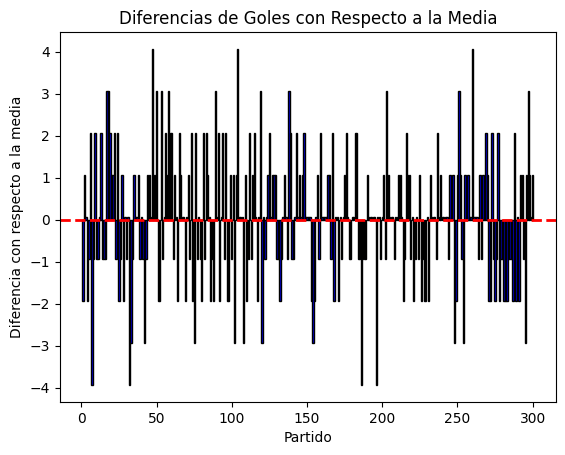

In [10]:

# Visualización del barplot de diferencias por partido
plt.bar(df_goles['Partido'], df_goles['Diferencia'], color='blue', edgecolor='black')
plt.axhline(0, color='red', linewidth=2, linestyle='--')
plt.title("Diferencias de Goles con Respecto a la Media")
plt.xlabel("Partido")
plt.ylabel("Diferencia con respecto a la media")
plt.show()


Arriba la media está donde el valor es 0. 

La media es un descriptivo?? 

Como esperanza es también un pronóstico, 

Notan como los errores tienden a ser simetricos?

Vamos a asumir lo siguiente. Si no hubiera nada que afecte el desempeño en el 
proximo partido el equipo anotaria 4 goles. Sin embargo, hay muchas cosas que 
afectan el desempenio de los jugadores, a veces para bien a veces para mal. Entonces

Lo que en un caso (Xi) hace que el valor esté arriba de la media, en otros hace que el valor esté abajo. Pero, en el agregado, en el valor medio, al estar en la mitad de la distribución, eso que afecta positivamente (sobreestima) o negativamente (subestima) se ve eliminado. Quitando un poco de rigor al ejemplo, en esa media estaríamos viendo la capacidad orgánica propia del equipo (sin afectaciones relacionadas a otras caracteristicas).

Nota: en general esto es importante para el tema de regresión. 

En suma, en las ejecuciones por encima o por debajo
**HAY ALGO QUE IMPIDE QUE EL VALOR VISTO SEA LA MEDIA QUE CONOCEMOS**  

### Cierre
Ideas a recapitular 
* La media es el valor esperado. 
* Los residuos son las desviaciones respecto a la media.
* La media es el valor que genera menos residuos. Es el estimador de MCO. 
* Si no hay nada (en los partidos) que condicione las ejecuciones (goles), las desviaciones de la media son simetricas, se distribuyen normalmente.
* El valor esperado permite ver las caracteristicas "Orgánicas" del fenómeno.